In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Load dataset
df = pd.read_csv('/content/Cleaned_Data.csv')
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,119,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000,21,27,13495,11.190476,9.370370,low,0,1
1,3,119,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000,21,27,16500,11.190476,9.370370,low,0,1
2,1,119,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000,19,26,16500,12.368421,9.730769,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500,24,30,13950,9.791667,8.433333,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500,18,22,17450,13.055556,11.500000,low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,3,95,gmc,turbo,four,hatchback,rwd,front,104.3,0.825084,...,160,5500,19,26,28989,12.368421,9.730769,medium,1,0
212,3,122,gmc,std,four,sedan,fwd,front,109.3,0.907256,...,114,5400,23,28,60132,10.217391,9.035714,low,0,1
213,-1,74,kia,std,four,sedan,rwd,front,104.3,0.907256,...,160,5500,19,26,55920,12.368421,9.730769,medium,0,1
214,2,122,kia,turbo,four,hatchback,rwd,front,109.3,0.825084,...,160,5500,19,26,23654,12.368421,9.730769,medium,1,0


In [3]:
# Define a dictionary to map each string value to its corresponding integer value
Cylinders = {'four': 4, 
             'six': 6, 
             'five': 5, 
             'eight': 8, 
             'two': 2,
             'three': 3, 
             'twelve': 12}

# Replace the string values in the 'num-of-cylinders' column with their integer values using the replace() method
df['Cylinders'] = df['num-of-cylinders'].replace(Cylinders)

# Print the modified DataFrame
print(df)

     symboling  normalized-losses         make aspiration num-of-doors  \
0            3                119  alfa-romero        std          two   
1            3                119  alfa-romero        std          two   
2            1                119  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
..         ...                ...          ...        ...          ...   
211          3                 95          gmc      turbo         four   
212          3                122          gmc        std         four   
213         -1                 74          kia        std         four   
214          2                122          kia      turbo         four   
215         -1                 95          kia        std         four   

      body-style drive-wheels engine-location  wheel-base    length  ...  \
0    convertible          rwd      

In [4]:
# Performing data preprocessing 
X = df[['horsepower', 
        'engine-size', 
        'curb-weight', 
        'Cylinders']] 
        
y = df['city-mpg']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Part 1:- Performing Linear regression using Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.4, 
                                                    random_state=42) # Assigning the test size to 40% for the linear reg model

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test) 
mae_lr = mean_absolute_error(y_test, y_pred_lr) # we define the mean absolute error of the linear reg model 

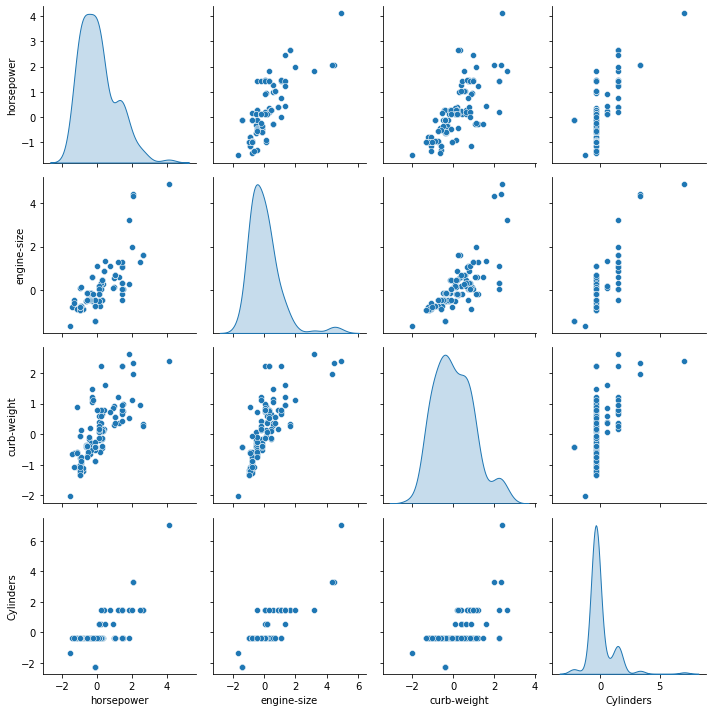

In [6]:
# Training the linear regression model using Scikit-learn 
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Plot a pairplot of the training data
sns.pairplot(pd.DataFrame(X_train, columns=X.columns)[['horsepower',
                                                       'engine-size',
                                                       'curb-weight', 
                                                       'Cylinders']],
             diag_kind='kde')
plt.tight_layout()

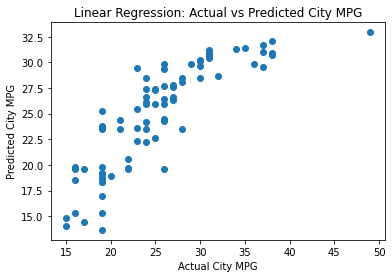

In [7]:
# ploting the predicted vs actual values of the linear regression 
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual City MPG')
plt.ylabel('Predicted City MPG')
plt.title('Linear Regression: Actual vs Predicted City MPG')
plt.show()

In [9]:
# Part 2: Deep learning using TensorFlow
nnmodel = Sequential([
    Dense(64, input_shape=(4,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

nnmodel.compile(loss='mean_absolute_error', optimizer='adam')

# Add checkpoint to save model with best performance
checkpoint_filepath = 'best_model.h5'
nnmodel_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history = nnmodel.fit(X_train, 
                      y_train, 
                      validation_data=(X_test, y_test), 
                      epochs=100, 
                      batch_size=100, 
                      verbose=0, 
                      callbacks=[nnmodel_checkpoint_callback])
nnmodel.load_weights(checkpoint_filepath)
y_pred_nn = nnmodel.predict(X_test)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

3/3 [==============================] - 0s 5ms/step


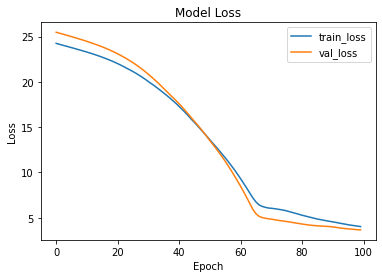

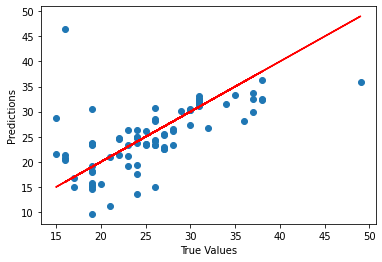

In [10]:
# plotting training history
plt.plot(history.history['loss'], 
         label='train_loss')
plt.plot(history.history['val_loss'], 
         label='val_loss')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting predictions
plt.scatter(y_test, y_pred_nn)
plt.plot(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [11]:
# Part 3: Compare performance of regression methods
print(f"Mean absolute error (linear regression): {mae_lr:.2f}")
print(f"Mean absolute error (neural network): {mae_nn:.2f}")

Mean absolute error (linear regression): 2.34
Mean absolute error (neural network): 3.66


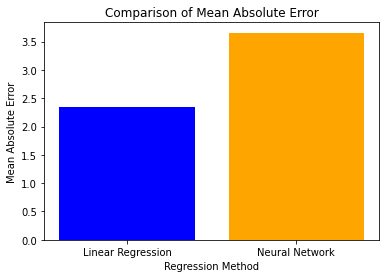

In [12]:
# Plotting the comparision of the Mean absolute error of the 2 models 
labels = ['Linear Regression', 'Neural Network']
mae = [mae_lr, mae_nn]

plt.bar(labels, mae, color=['blue', 'orange'])
plt.title('Comparison of Mean Absolute Error')
plt.xlabel('Regression Method')
plt.ylabel('Mean Absolute Error')
plt.show()


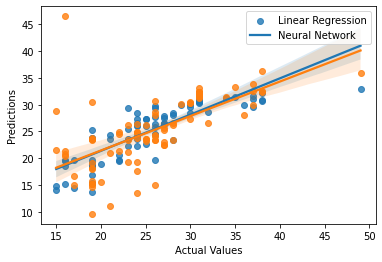

In [13]:
 # Combining the predicted values and true values into a single DataFrame
dfresult = pd.DataFrame({'y_true': y_test, 
                         'y_pred_lr': y_pred_lr.flatten(), 
                         'y_pred_nn': y_pred_nn.flatten()})

# Plot the linear reg prediction against the actual values
sns.regplot(x='y_true', y='y_pred_lr', data=dfresult)

# Plot the neural network prediction against the actual values
sns.regplot(x='y_true', y='y_pred_nn', data=dfresult)

# Add labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend(['Linear Regression', 'Neural Network'])
plt.show()

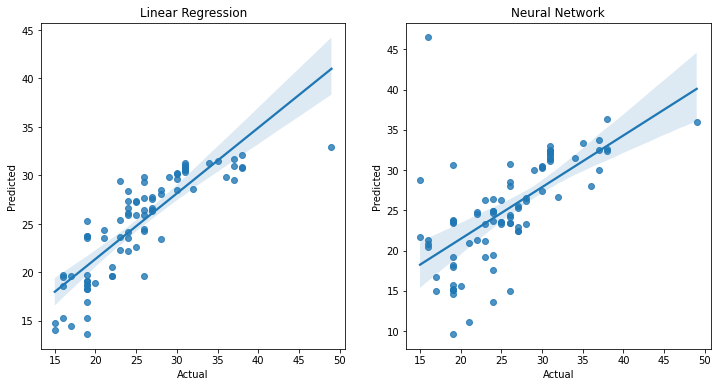

In [14]:
# Part 4: Visualize using regplot, predictions vs actual values for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.regplot(x=y_test, y=y_pred_lr, ax=axes[0])
sns.regplot(x=y_test, y=y_pred_nn.flatten(), ax=axes[1])
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Linear Regression')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Neural Network')
plt.show()

---End of Code---